In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import fancyimpute

ModuleNotFoundError: No module named 'fancyimpute'

In [2]:
df = pd.read_csv("./loans.csv")

In [5]:
df.shape

(9578, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit_policy        9578 non-null int64
purpose              9578 non-null object
int_rate             9578 non-null float64
installment          9578 non-null float64
log_annual_inc       9574 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days_with_cr_line    9549 non-null float64
revol_bal            9578 non-null int64
revol_util           9516 non-null float64
inq_last_6mths       9549 non-null float64
delinq_2yrs          9549 non-null float64
pub_rec              9549 non-null float64
not_fully_paid       9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1010.2+ KB


* one categorical feature ("purpose")
* thirteen numerical features

In [3]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


Sum of null values in each feature. Six features have missing values (no missing values in labels).

In [7]:
df.isnull().sum()

credit_policy         0
purpose               0
int_rate              0
installment           0
log_annual_inc        4
dti                   0
fico                  0
days_with_cr_line    29
revol_bal             0
revol_util           62
inq_last_6mths       29
delinq_2yrs          29
pub_rec              29
not_fully_paid        0
dtype: int64

In [20]:
# Get number of positve and negative examples
pos = df[df["not_fully_paid"] == 1].shape[0]
neg = df[df["not_fully_paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
total = pos + neg
print(pos/total)
print(neg/total)

Positive examples = 1533
Negative examples = 8045
Proportion of positive to negative examples = 19.06%
0.16005429108373356
0.8399457089162664


Text(0.5, 1, 'Class counts')

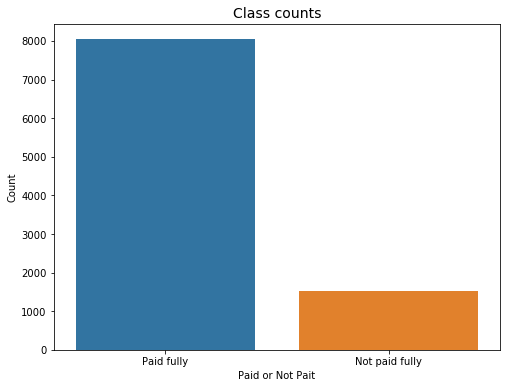

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(df["not_fully_paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("Paid or Not Pait")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 14})

Create dummy variables from the feature "purpose" since its nominal (not ordinal) categorical variable. It's also a good practice to drop the first one to avoid linear dependency between the resulted features since some algorithms may struggle with this issue.

In [35]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [26]:
df1 = pd.get_dummies(df, columns=["purpose"], drop_first=True)
df1.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,1,0,0,0,0,0


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit_policy                 9578 non-null int64
int_rate                      9578 non-null float64
installment                   9578 non-null float64
log_annual_inc                9574 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days_with_cr_line             9549 non-null float64
revol_bal                     9578 non-null int64
revol_util                    9516 non-null float64
inq_last_6mths                9549 non-null float64
delinq_2yrs                   9549 non-null float64
pub_rec                       9549 non-null float64
not_fully_paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase   

Add binary features to check if there is missing values in each row for each feature that has missing values. For example, "log_annual_inc" feature has missing values, so we would add a feature "is_log_annual_inc_missing" that takes the values ∈{0,1}.

In [42]:
df2 = df1.copy()
for feature in df1.columns:
    if np.any(np.isnan(df1[feature])):
        df2["is_" + feature + "_missing"] = np.isnan(df1[feature]) * 1

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,...,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,is_log_annual_inc_missing,is_days_with_cr_line_missing,is_revol_util_missing,is_inq_last_6mths_missing,is_delinq_2yrs_missing,is_pub_rec_missing
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 25 columns):
credit_policy                   9578 non-null int64
int_rate                        9578 non-null float64
installment                     9578 non-null float64
log_annual_inc                  9574 non-null float64
dti                             9578 non-null float64
fico                            9578 non-null int64
days_with_cr_line               9549 non-null float64
revol_bal                       9578 non-null int64
revol_util                      9516 non-null float64
inq_last_6mths                  9549 non-null float64
delinq_2yrs                     9549 non-null float64
pub_rec                         9549 non-null float64
not_fully_paid                  9578 non-null int64
purpose_credit_card             9578 non-null uint8
purpose_debt_consolidation      9578 non-null uint8
purpose_educational             9578 non-null uint8
purpose_home_improvement        9578 non-nu

Split Train/Test data on 80/20. Train has 24 columns. Test only 1 column.

In [46]:
# Original Data
X = df2.loc[:, df2.columns != "not_fully_paid"].values
y = df2.loc[:, df2.columns == "not_fully_paid"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)
print(f"Original data shapes: {X_train.shape, X_test.shape}")

Original data shapes: ((7662, 24), (1916, 24))


In [64]:
# Drop NA and remove binary columns
train_indices_na = np.max(np.isnan(X_train), axis=1)
test_indices_na = np.max(np.isnan(X_test), axis=1)
X_train_dropna, y_train_dropna = X_train[~train_indices_na, :][:, :-6], y_train[~train_indices_na]
X_test_dropna, y_test_dropna = X_test[~test_indices_na, :][:, :-6], y_test[~test_indices_na]
print(f"After dropping NAs: {X_train_dropna.shape, X_test_dropna.shape}")

After dropping NAs: ((7611, 18), (1905, 18))


In [65]:
# MICE data
mice = fancyimpute.MICE(verbose=0)
X_mice = mice.complete(X)
X_train_mice, X_test_mice, y_train_mice, y_test_mice = train_test_split(
    X_mice, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)
print(f"MICE data shapes: {X_train_mice.shape, X_test_mice.shape}")

NameError: name 'fancyimpute' is not defined